## Reading and Understanding the Data

In [1]:
# Importing all the required libraries

import warnings  
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import sklearn

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score


In [2]:
# Reading and displaying the dataset

dataset = pd.read_csv("/Users/biplab/Downloads/day.csv")

In [3]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data Preparation 

In [4]:
# Checking Datatypes

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Checking if there is any null values

dataset.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# checking total rows and columns in a dataset

dataset.shape

(730, 16)

In [7]:
# Checking the duplicates values

dataset.duplicated().value_counts()

False    730
dtype: int64

No duplicate values have found

#### Dropping "instant" as its only tells the index number and "dteday" which have already splitted into weekday, month, and year, thus not required during model building and prediction.

In [8]:
# dropping instant and dteday columns

dataset=dataset.drop(["instant","dteday"], axis=1)
dataset.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
# summary of various statistical measures for each numeric column in the DataFrame

dataset.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


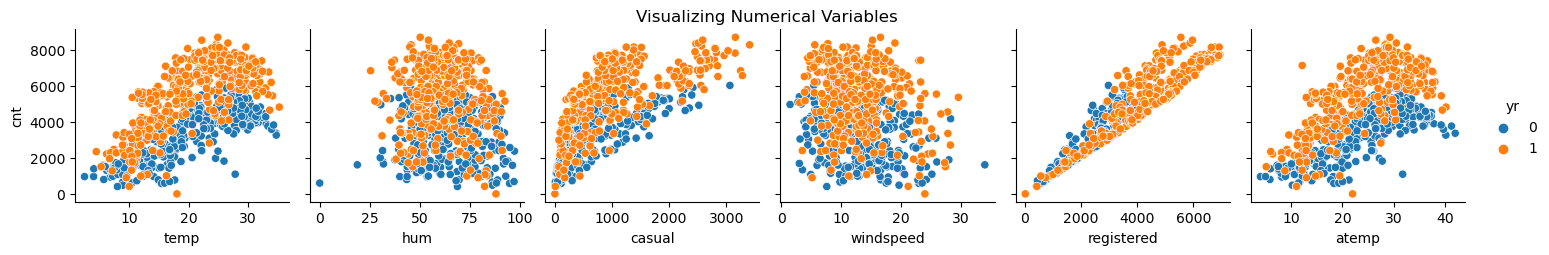

In [10]:
# visualizing the numeric variables against target variable "cnt" of the dataset using pairplot

sns.pairplot(dataset, x_vars=["temp", "hum","casual","windspeed","registered","atemp"], y_vars=["cnt"], hue="yr")
plt.subplots_adjust(top=0.9)
plt.suptitle("Visualizing Numerical Variables",size=12)
plt.show()

As we can see the Bike rentals have been increased from 2018 to 2019.

- Defining numerical values to their respective string values for further analysis and dummy creation for model building.Values are not converting to str which are already in 0 and 1 binary forms.
- Data have been taken from "Bike sharing dictionary".

In [11]:
# Create dictionary values

season_data = {1:"spring", 2:"summer", 3:"fall", 4:"winter"}

mnth_data = {1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"June",7:"July",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"}

weekday_data = {0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thu",5:"Fri",6:"Sat"}

weathersit_data = {1:"Clear",
                   2:"Mist + Cloudy",
                   3:"Light Snow + Light Rain",
                   4:"Heavy Rain + Ice Pallets"}


In [12]:
# Mapping the above data into the dataset

dataset["season"] = dataset["season"].map(season_data)
dataset["mnth"] = dataset["mnth"].map(mnth_data)
dataset["weekday"] = dataset["weekday"].map(weekday_data)
dataset["weathersit"] = dataset["weathersit"].map(weathersit_data)

dataset.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


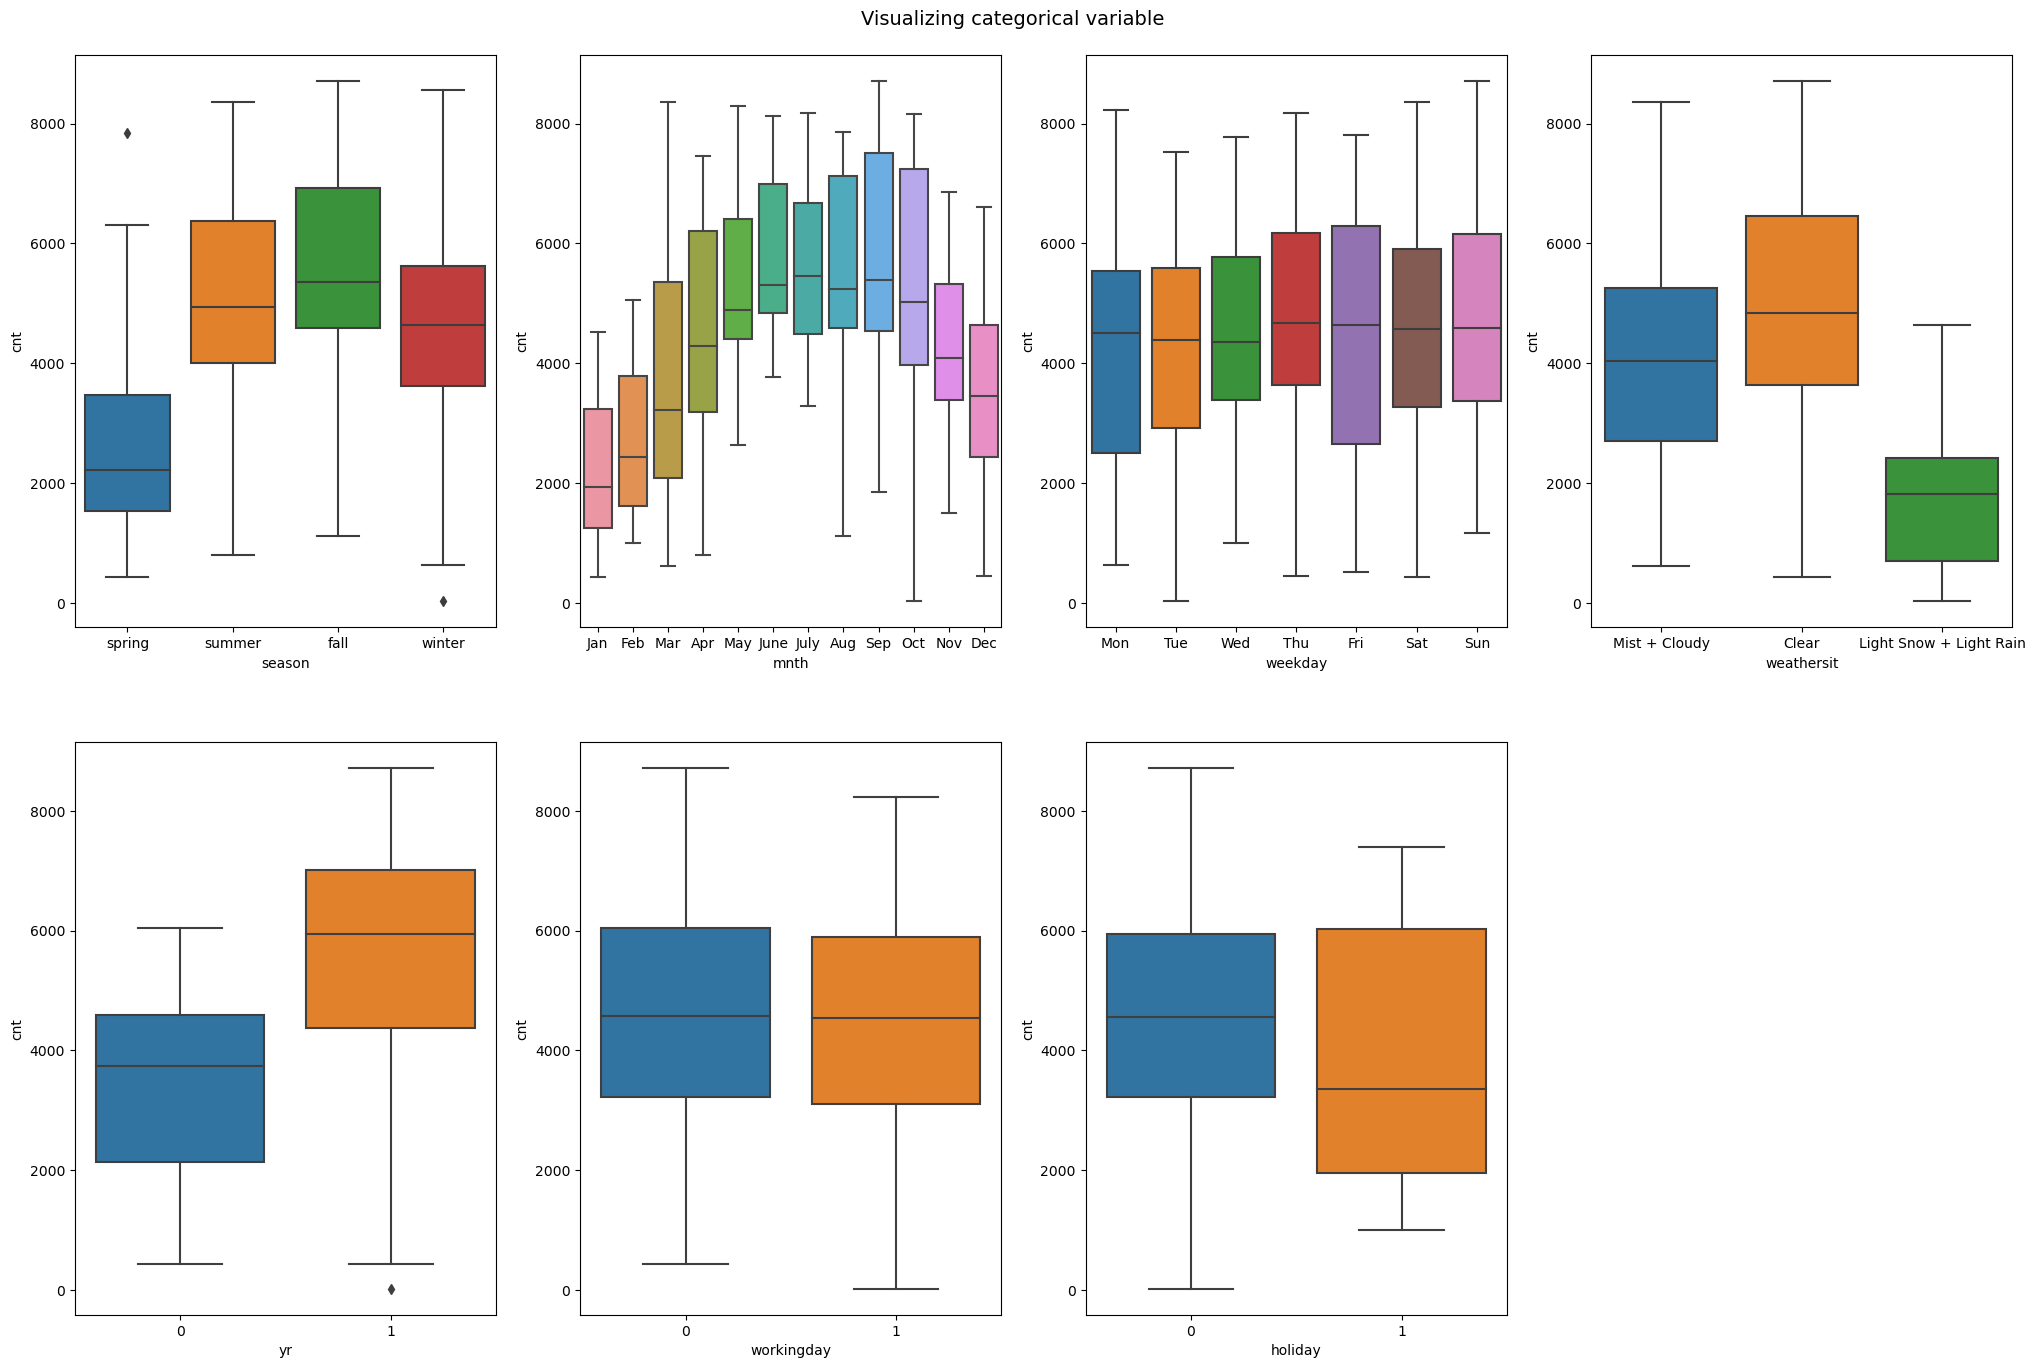

In [13]:
#visualizing the categorical variables of the dataset using boxplot 

plt.figure(figsize=(25, 15))
plt.subplot(2, 4, 1)
sns.boxplot(x='season', y='cnt', data=dataset)
plt.subplot(2, 4, 2)
sns.boxplot(x='mnth', y='cnt', data=dataset)
plt.subplot(2, 4, 3)
sns.boxplot(x='weekday', y='cnt', data=dataset)
plt.subplot(2, 4, 4)
sns.boxplot(x='weathersit', y='cnt', data=dataset)
plt.subplot(2, 4, 5)
sns.boxplot(x='yr', y='cnt', data=dataset)
plt.subplot(2, 4, 6)
sns.boxplot(x='workingday', y='cnt', data=dataset)
plt.subplot(2, 4, 7)
sns.boxplot(x='holiday', y='cnt', data=dataset)
plt.subplots_adjust(top=0.95)
plt.suptitle("Visualizing categorical variable",size=14)
plt.show()

The above plots shows the relationship between categorical varibales and target variable.

- Counts are more during the Fall season less in spring.
- More Bikes are rented in the month of September and October.
- Bike counts are more in the year 2019 compared to 2018.
- Counts are more in clear weather.
- Counts are more on Friday, then sunday and thursday.

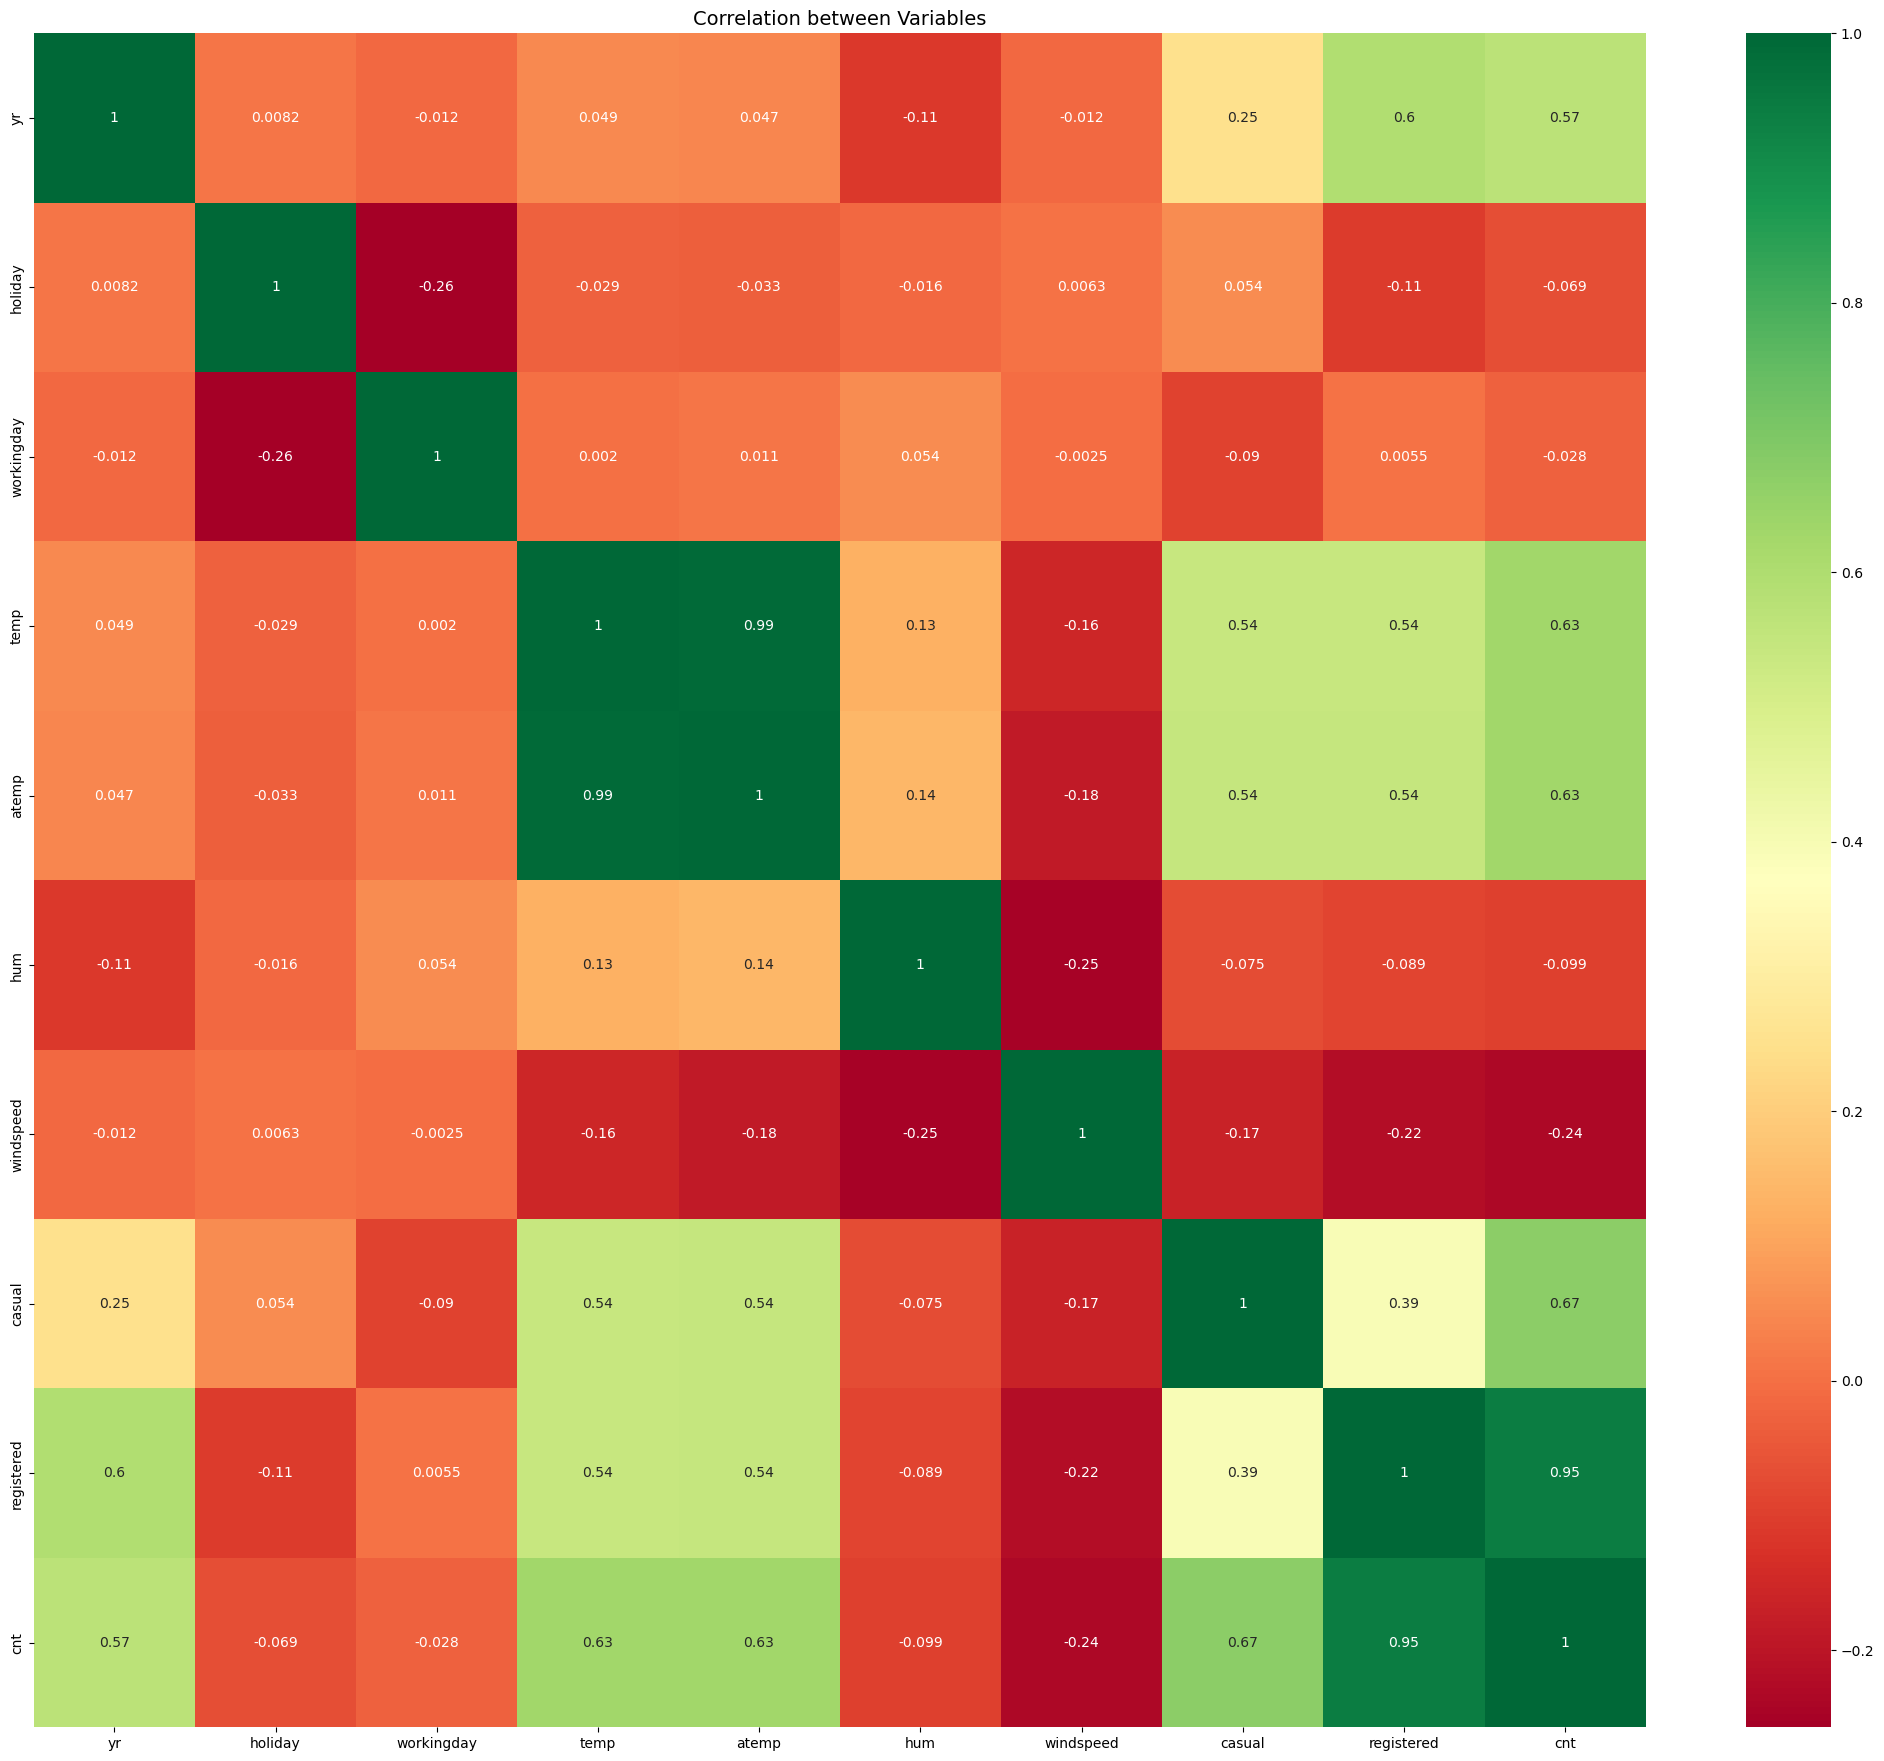

In [14]:
# Lets check the correlation between the variables using Heatmap

plt.figure(figsize=(26, 22))
sns.heatmap(dataset.corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation between Variables",size=14)
plt.show()

- As we can see "temp", "atemp", "casual", "yr", and "registered" variables are correlated with "cnt" which is the target variable.
- temp and atemp values are same and strongly correlated with cnt.
- registered users are more than casual users and strongly correlated.

In [15]:
# since "temp" and "atemp" both are same with strong correlation, so, we can drop atemp. 
# Also we can see the addition of "casual" and "registered" users are included in the "cnt" column. So, we can drop these two.

dataset = dataset.drop(["casual", "registered","atemp"], axis=1)
dataset.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


In [16]:
# Creating dummy varibles for season, mnth, weekday, and weathersit variables from its categorical string variables

season_dummy = pd.get_dummies(dataset["season"], drop_first=True)
mnth_dummy = pd.get_dummies(dataset["mnth"], drop_first=True)
weekday_dummy = pd.get_dummies(dataset["weekday"], drop_first=True)
weathersit_dummy = pd.get_dummies(dataset["weathersit"], drop_first=True)
                              


In [17]:
# Concatenating dummy varibales with the dataset

dataset = pd.concat([dataset,season_dummy,mnth_dummy,weekday_dummy,weathersit_dummy],axis=1)

In [18]:
# After getting all the required dummy columns, dropping its previous columns

dataset = dataset.drop(["season","mnth","weekday","weathersit"], axis=1)
dataset.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow + Light Rain,Mist + Cloudy
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


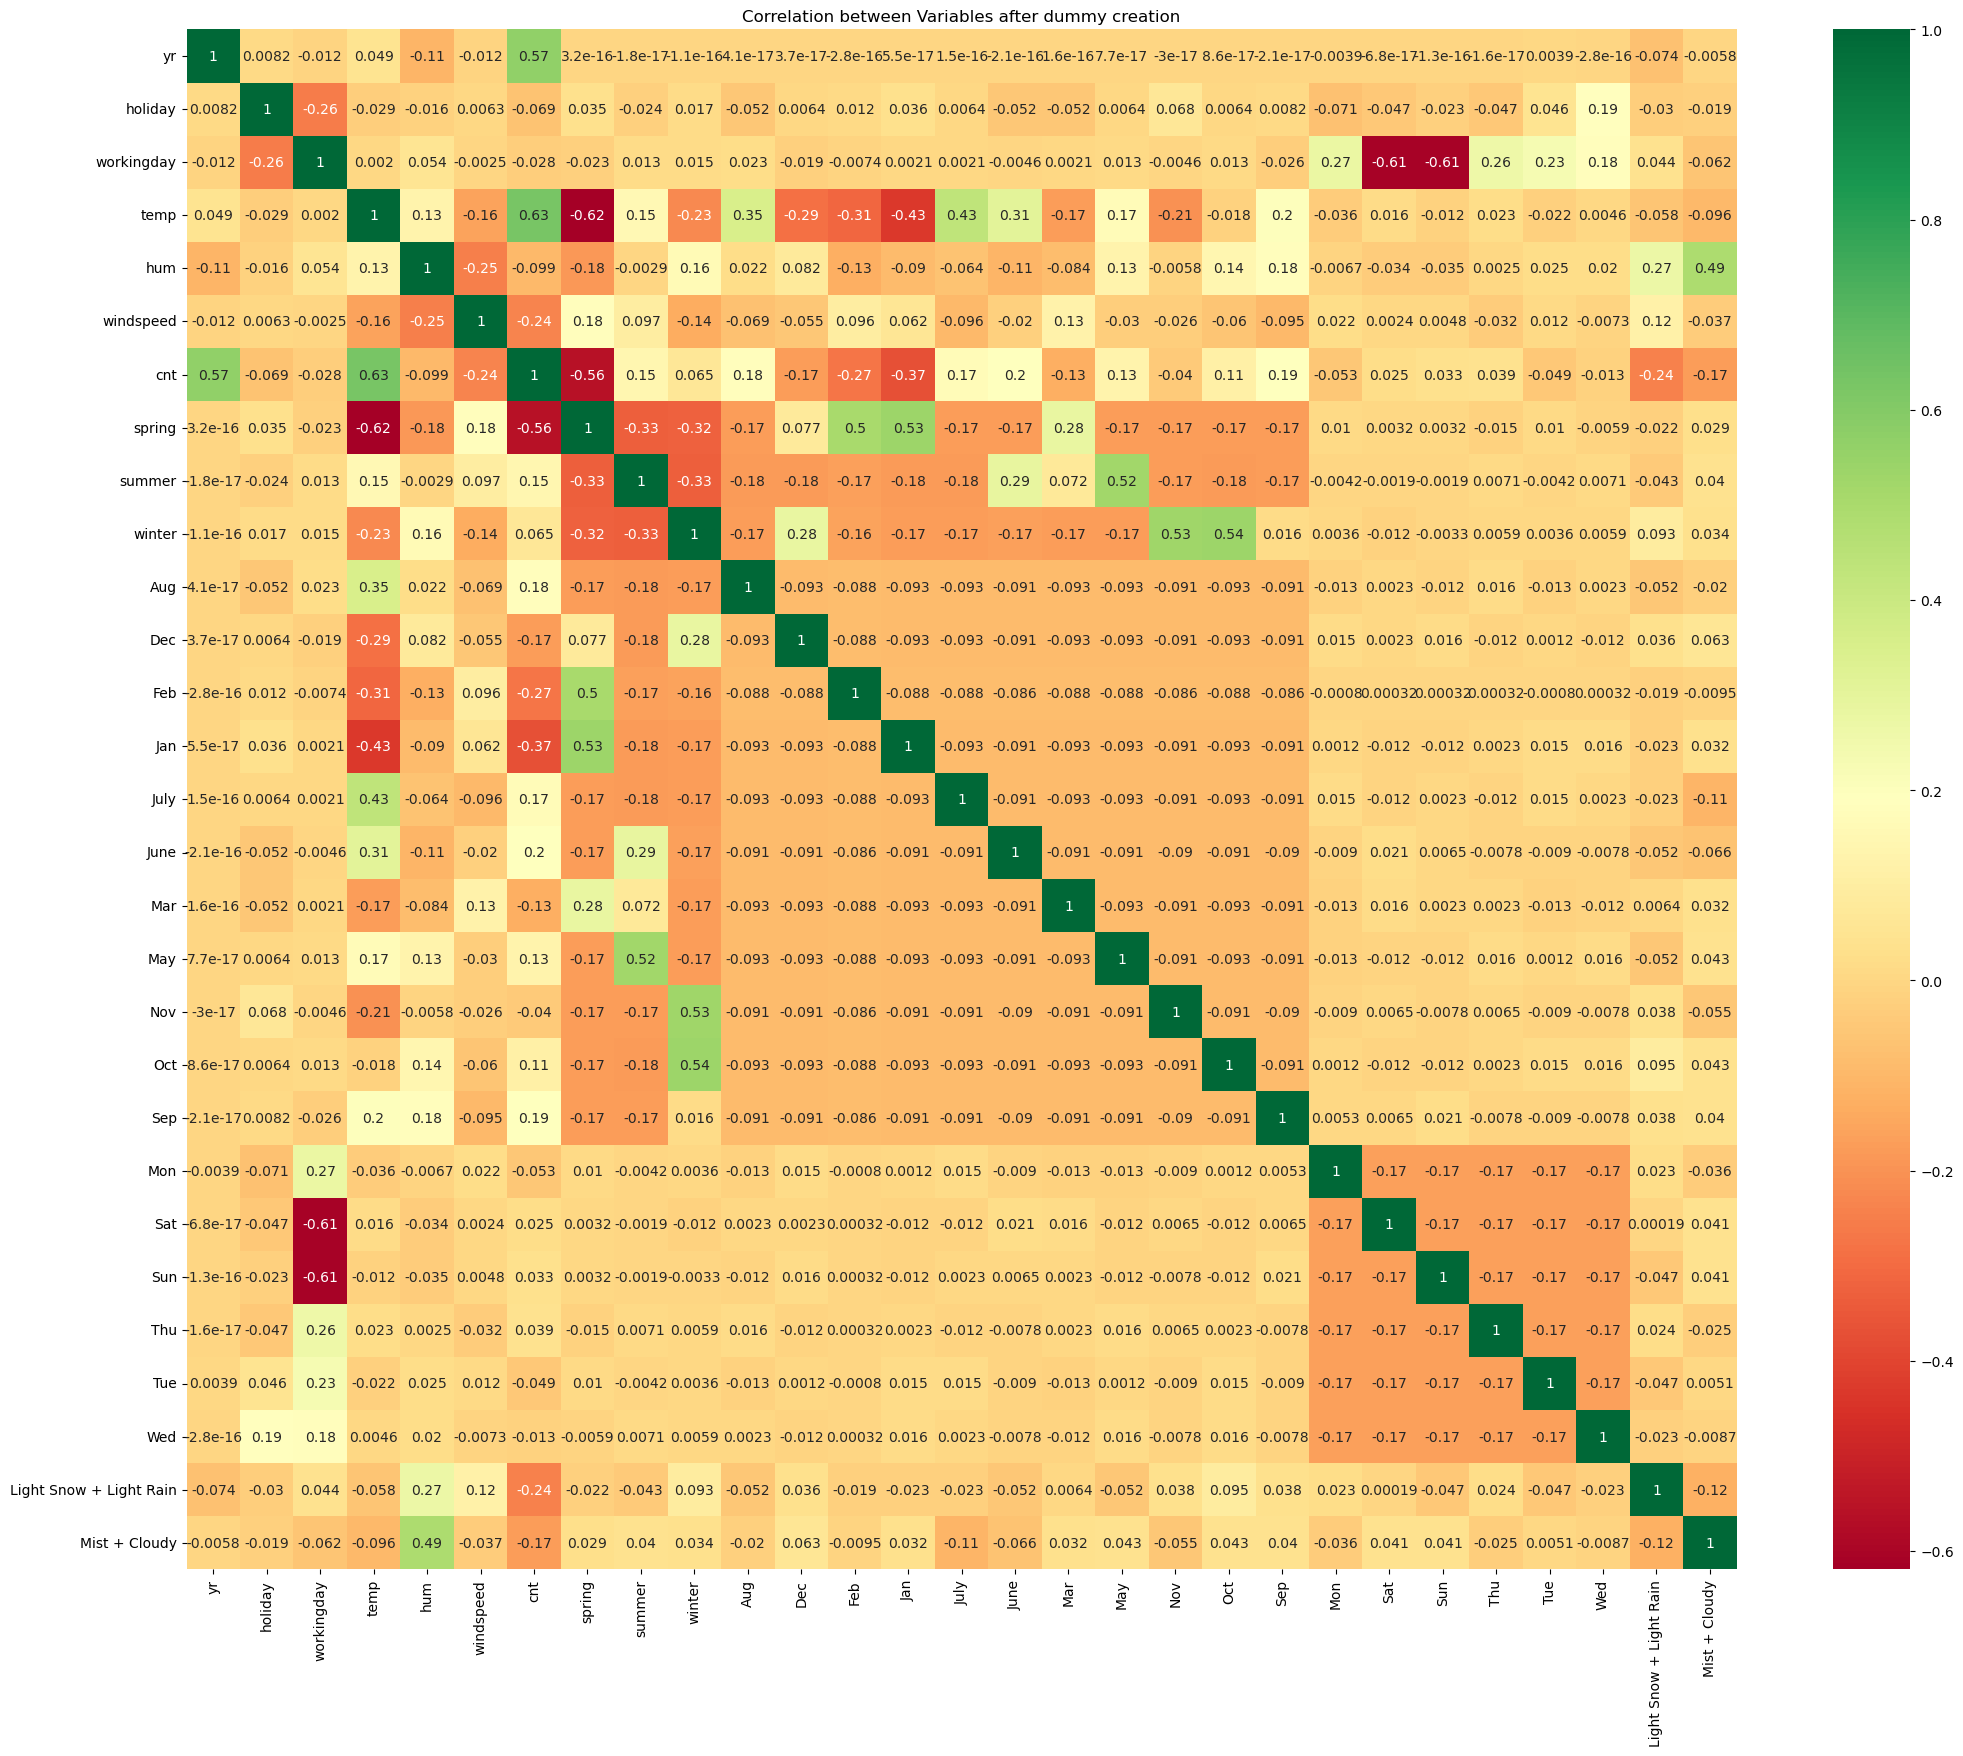

In [19]:
# Again checking the correlation between variables after dummies are included

plt.figure(figsize=(25,20))
sns.heatmap(dataset.corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation between Variables after dummy creation")
plt.show()

- temp (0.63) and yr (0.57) are highly correlated with "count" column, indicating higher number of Bike rentals with these key features. 
- Also we have seen July and Sep are having positive strongly correlated with "count" as compared to other months, which describes more number of Bike rent transactions.

## Data spliting into train and test set

In [20]:
# train_test_split 

from sklearn.model_selection import train_test_split

dataset_train, dataset_test = train_test_split(dataset, train_size=0.7,test_size=0.3, random_state=100)

# divided the dataset into training set at 70% and testing set at 30%  

In [21]:
# Applying all features of a dataset onto a similar scale via feature scaling method.
# Here, We will apply MinMaxScaler method to rescale all the feature values which are not comes between 0 and 1.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

cols_to_scale = ["temp","cnt","hum","windspeed"]

dataset_train[cols_to_scale] = scaler.fit_transform(dataset_train[cols_to_scale])

dataset.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow + Light Rain,Mist + Cloudy
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


- MinMaxScaler() scales each features in the dataset to the range of 0 and 1.
- All numeric features are now mapped between 0 and 1

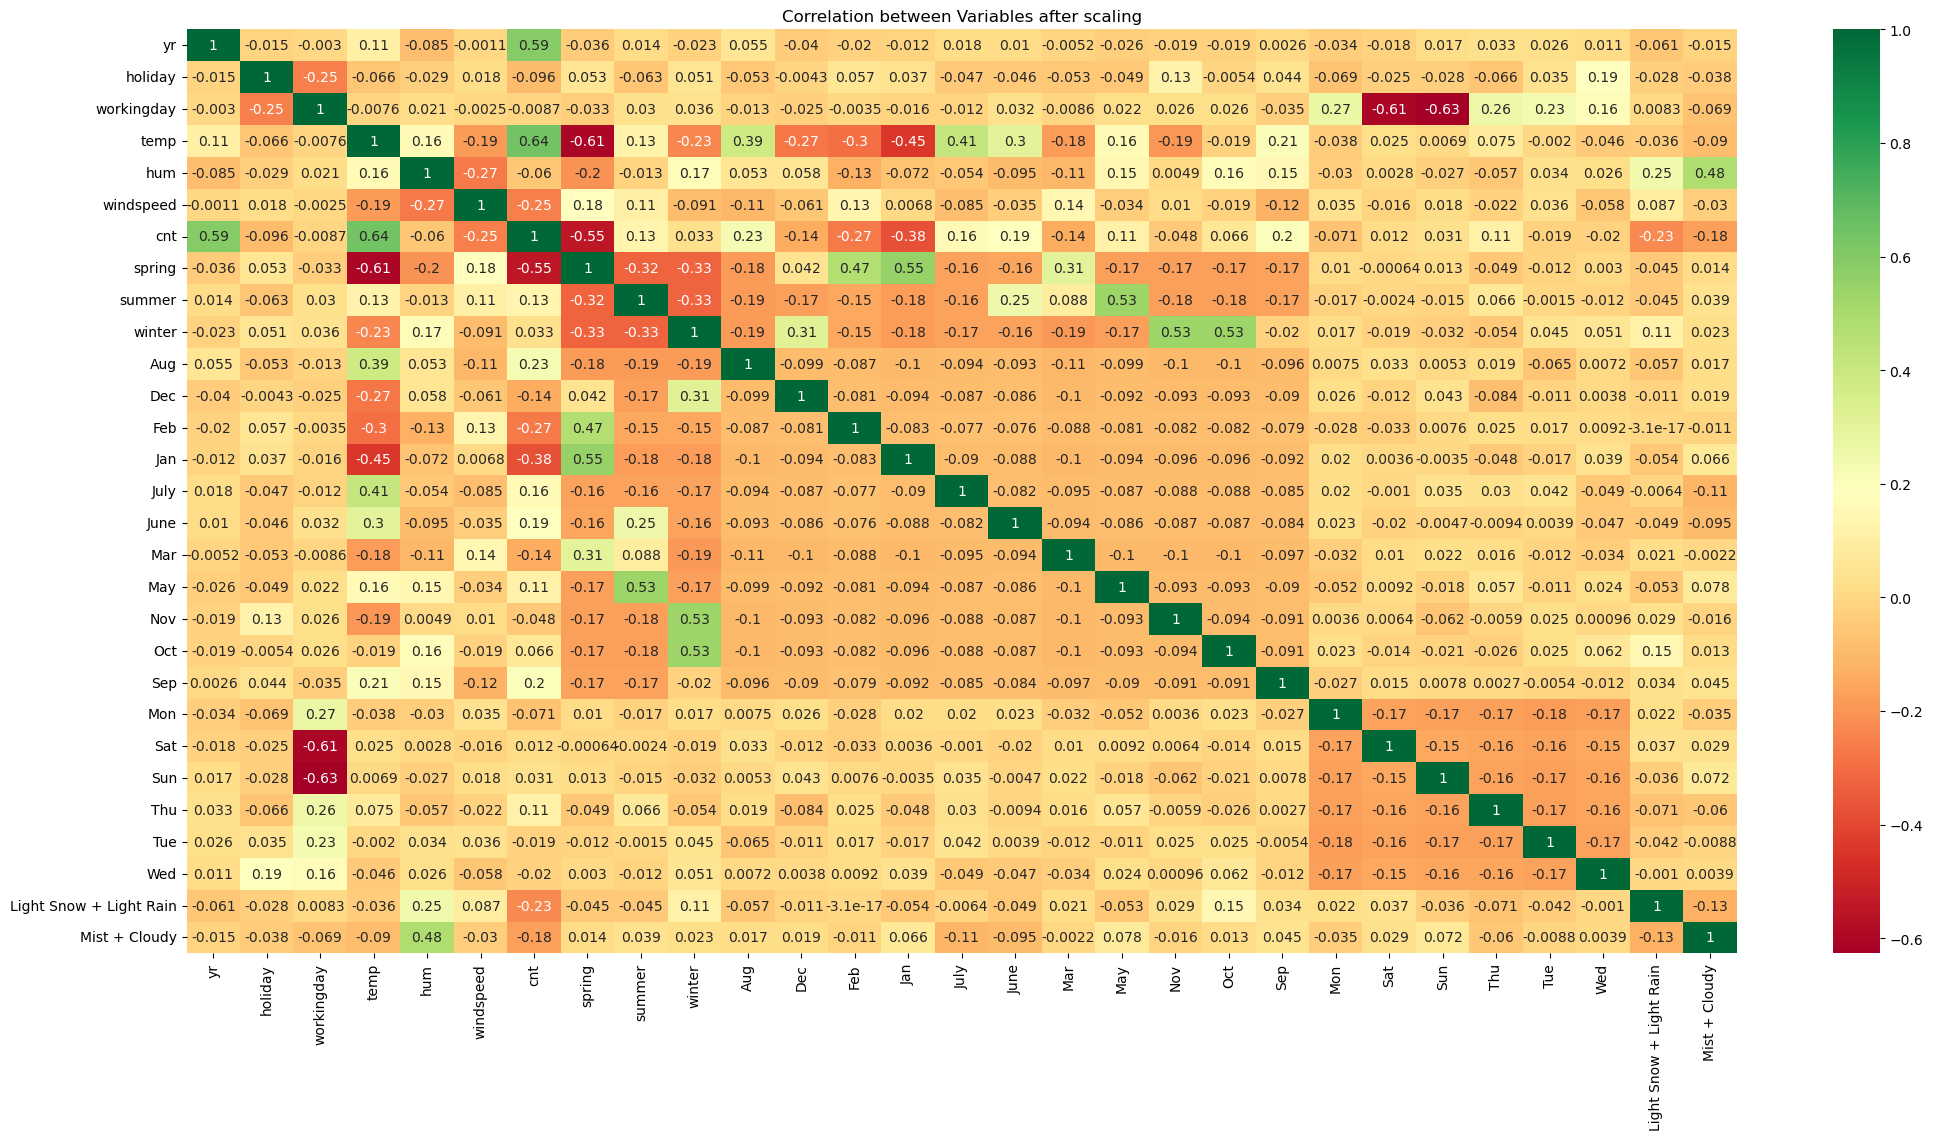

In [22]:
# Checking all the varibales' correlation after scaling

plt.figure(figsize=(25, 12))
sns.heatmap(dataset_train.corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation between Variables after scaling")
plt.show()

## Diving dataset into X and y sets for the Model Building (Linear Regression)

In [23]:
# Defining X and y value to build the Linear Regression Model

y_train = dataset_train.pop("cnt")
X_train = dataset_train

In [24]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Aug,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow + Light Rain,Mist + Cloudy
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


## Building Linear Regression Model

- Apply Linear Regression model using sklearn and later we will use statsmodel to check model's statistical behaviour and the elimination of required features .

In [25]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)


LinearRegression()

- Applying RFE, which is a feature selection technique provided by scikit-learn to select the most important features from a given dataset to improve model performance and reduce overfitting.

In [26]:
# Apply RFE method to see all varibales' rank 

from sklearn.feature_selection import RFE

rfe = RFE(estimator=lm,n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)

# n_features_to_select=15 shows 15 most important features after the RFE process.

In [27]:
# Lets see all the RFE supported and non-supported columns in rankwise.
# All rank 1 shows the supported and others non-supported by its rank. 

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', True, 1),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thu', False, 12),
 ('Tue', False, 7),
 ('Wed', False, 10),
 ('Light Snow + Light Rain', True, 1),
 ('Mist + Cloudy', True, 1)]

In [28]:
# Columns where RFE supports 

support_col = X_train.columns[rfe.support_]
support_col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Dec', 'Jan', 'July', 'Nov', 'Sep', 'Light Snow + Light Rain',
       'Mist + Cloudy'],
      dtype='object')

In [29]:
# Columns where RFE not supports

nonsupport_col = X_train.columns[~rfe.support_]
nonsupport_col

Index(['workingday', 'Aug', 'Feb', 'June', 'Mar', 'May', 'Oct', 'Mon', 'Sat',
       'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

### Model building using statsmodel.api, for the detailed statistics

In [30]:
# Creating X_test dataframe with RFE selected variables

X_train_rfe = X_train[support_col]

In [31]:
# importing statsmodels for linear regression

import statsmodels.api as sm 

# defining function for regression model in stats

def regmodel(y_train, X_train_rfe):
    X_train_rfe = sm.add_constant(X_train_rfe)
    lm = sm.OLS(y_train,X_train_rfe).fit()
    print(lm.summary())


In [32]:
# Lets see the summary statictics of regression model

regmodel(y_train,X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 01 Aug 2023   Prob (F-statistic):          3.34e-189
Time:                        16:20:58   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

 #### Applying VIF (Variance Inflation Factor) to assess the degree of multicollinearity of feature variables

In [33]:
# defining function for VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(dataframe):
    vif = pd.DataFrame()
    X = X_train_rfe
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

    

In [34]:
# lets check all the vif values 

vif(X_train_rfe)

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.81
14,Mist + Cloudy,2.32
0,yr,2.09
11,Nov,1.83
9,Jan,1.75


#### Dropping the variables which is >5 after VIF calculation to avoid distorting the VIF values and to provide a better assessment of multicollinearity among the independent variables in the linear regression model.

In [35]:
# dropping "hum" as its VIF value is 30.94, greater than 5

X_train_rfe = X_train_rfe.drop(labels="hum",axis=1)

In [36]:
# Rebuilding the model

regmodel(y_train,X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Tue, 01 Aug 2023   Prob (F-statistic):          1.57e-186
Time:                        16:20:58   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [37]:
vif(X_train_rfe)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.94
4,spring,2.89
5,summer,2.23
0,yr,2.07
10,Nov,1.80
8,Jan,1.66
9,July,1.59
13,Mist + Cloudy,1.56


#### Now lets check and compare the p-values < 0.05 and VIF < 5 values in order to summarize the significance

In [38]:
# dropping "temp" as VIF is 5.17, which is more than 5

X_train_rfe1=X_train_rfe.drop(labels="temp",axis=1)
regmodel(y_train,X_train_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     145.8
Date:                Tue, 01 Aug 2023   Prob (F-statistic):          5.50e-160
Time:                        16:20:58   Log-Likelihood:                 439.69
No. Observations:                 510   AIC:                            -851.4
Df Residuals:                     496   BIC:                            -792.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [39]:
vif(X_train_rfe1)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.94
4,spring,2.89
5,summer,2.23
0,yr,2.07
10,Nov,1.80
8,Jan,1.66
9,July,1.59
13,Mist + Cloudy,1.56


### We had dropped "temp" and checked the R-Squared and Adjusted R-Squared values dropped from 0.84 to 0.79, and 0.83 to 0.78, so we kept this as of now.

In [40]:
# Dropping "windspeed" as VIF value is 4.67 which is near VIF=5

X_train_rfe=X_train_rfe.drop(labels="windspeed",axis=1)

In [41]:
# Rebuilding the model

regmodel(y_train,X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     182.5
Date:                Tue, 01 Aug 2023   Prob (F-statistic):          1.92e-179
Time:                        16:20:58   Log-Likelihood:                 486.00
No. Observations:                 510   AIC:                            -944.0
Df Residuals:                     496   BIC:                            -884.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [42]:
# dropping "summer" as high p-value

X_train_rfe=X_train_rfe.drop(labels="summer",axis=1)

In [43]:
# rebuilding the model

regmodel(y_train,X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     196.9
Date:                Tue, 01 Aug 2023   Prob (F-statistic):          4.48e-180
Time:                        16:20:58   Log-Likelihood:                 484.75
No. Observations:                 510   AIC:                            -943.5
Df Residuals:                     497   BIC:                            -888.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [44]:
vif(X_train_rfe)

,Features,VIF
2,temp,3.04
4,winter,2.51
0,yr,2.05
3,spring,1.93
8,Nov,1.78
6,Jan,1.65
11,Mist + Cloudy,1.52
5,Dec,1.46
7,July,1.34
9,Sep,1.20


### So, We got out best model with p-values<0.05 and VIF<5 
### But, lets check again if we get p-values=0 and VIF much lesser than 5

In [45]:
# dropping "Jan" (0.042) which is near p-value=0.05

X_train_rfe=X_train_rfe.drop(labels="Jan",axis=1)

In [46]:
regmodel(y_train,X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     213.1
Date:                Tue, 01 Aug 2023   Prob (F-statistic):          2.34e-180
Time:                        16:20:58   Log-Likelihood:                 482.63
No. Observations:                 510   AIC:                            -941.3
Df Residuals:                     498   BIC:                            -890.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [47]:
vif(X_train_rfe)

,Features,VIF
2,temp,2.99
4,winter,2.49
0,yr,2.05
7,Nov,1.77
10,Mist + Cloudy,1.51
5,Dec,1.42
6,July,1.33
3,spring,1.29
8,Sep,1.20
9,Light Snow + Light Rain,1.07


In [48]:
# dropping "Dec" as high p-value

X_train_rfe=X_train_rfe.drop(labels="Dec",axis=1)
regmodel(y_train,X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.0
Date:                Tue, 01 Aug 2023   Prob (F-statistic):          7.68e-181
Time:                        16:20:59   Log-Likelihood:                 480.95
No. Observations:                 510   AIC:                            -939.9
Df Residuals:                     499   BIC:                            -893.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [49]:
vif(X_train_rfe)

,Features,VIF
2,temp,2.99
0,yr,2.05
4,winter,1.89
6,Nov,1.57
9,Mist + Cloudy,1.51
5,July,1.33
3,spring,1.25
7,Sep,1.20
1,holiday,1.06
8,Light Snow + Light Rain,1.06


In [50]:
# dropping "Nov" as high p-value

X_train_rfe=X_train_rfe.drop(labels="Nov",axis=1)
regmodel(y_train,X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.5
Date:                Tue, 01 Aug 2023   Prob (F-statistic):          2.16e-181
Time:                        16:20:59   Log-Likelihood:                 479.38
No. Observations:                 510   AIC:                            -938.8
Df Residuals:                     500   BIC:                            -896.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [51]:
vif(X_train_rfe)

,Features,VIF
2,temp,2.99
0,yr,2.05
8,Mist + Cloudy,1.51
4,winter,1.33
5,July,1.33
3,spring,1.25
6,Sep,1.19
7,Light Snow + Light Rain,1.06
1,holiday,1.04


#### The p values represent the significance of the variables and VIF which represent how variables are correlated to each other. Based on these two parameters we decided which variable to drop. Now, VIFs and p-values both are within an acceptable range, So we can stop here as our assumption of Multicollinearity is fulfilled and continue to our further analysis. 

#### We also have R-squared value = 0.823, Adjusted R-squared = 0.819, and Prob(F-statistic) value is  very low, which states that our overall model is a good fit.

## Residual Analysis

#### Residual value determines the difference between the observed target (dependent) variable and the predicted target variable based on a regression model.

In [52]:
# Building the model again for residual analysis

X_train_final = sm.add_constant(X_train_rfe)
X_train_final.head()

,const,yr,holiday,temp,spring,winter,July,Sep,Light Snow + Light Rain,Mist + Cloudy
653,1.0,1,0,0.509887,0,1,0,0,0,0
576,1.0,1,0,0.815169,0,0,1,0,0,0
426,1.0,1,0,0.442393,1,0,0,0,0,1
728,1.0,1,0,0.245101,1,0,0,0,0,0
482,1.0,1,0,0.395666,0,0,0,0,0,1


In [53]:
# predict the values 

lm = sm.OLS(y_train,X_train_final).fit()
y_train_pred = lm.predict(X_train_final)
y_train_pred

653    0.722904
576    0.742189
426    0.445038
728    0.431652
482    0.533730
         ...   
526    0.735791
578    0.833955
53     0.178598
350    0.287003
79     0.332260
Length: 510, dtype: float64

In [54]:
# residual value (Actual value - Predicted value)

res = y_train-y_train_pred
res

653    0.141339
576    0.085469
426    0.020217
728   -0.227556
482   -0.050757
         ...   
526    0.028360
578   -0.001120
53     0.039418
350    0.025583
79    -0.095836
Length: 510, dtype: float64

#### Let's check if error terms are also normally distributed using Histogram.

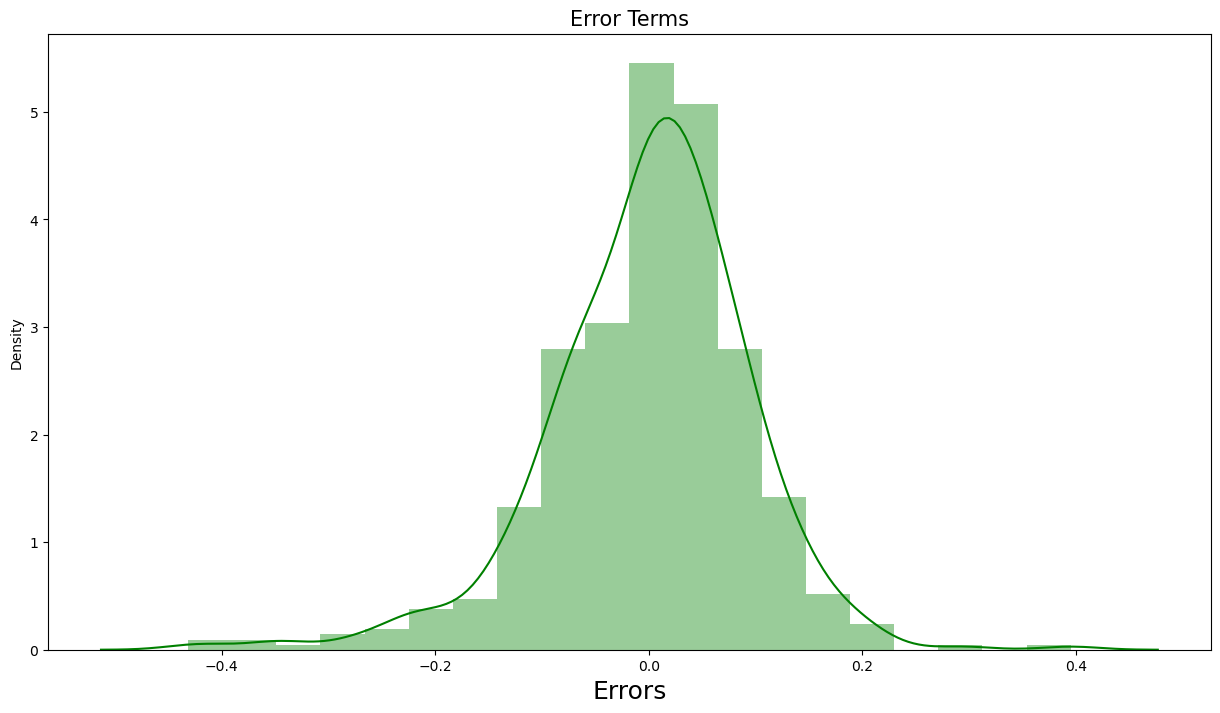

In [55]:
# Plotting error distributions to the residual analysis

plt.figure(figsize=[15,8])
sns.distplot(res, bins=20, color="Green")
plt.title('Error Terms', fontsize=15)                  
plt.xlabel('Errors', fontsize = 18)  
plt.show()

As per the above plot, we can see error terms are normally distributed.

### Making Predictions on the testing set

 Before making the prediction, we are scaling the test data using MinMaxScaling. 

In [56]:
cols_to_scale = ["temp","cnt","hum","windspeed"]

dataset_test[cols_to_scale] = scaler.fit_transform(dataset_test[cols_to_scale])


In [57]:
dataset_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow + Light Rain,Mist + Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.546312,0.508750,0.418870,0.516216,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635
std,0.500722,0.188034,0.481313,0.249189,0.201253,0.188111,0.238702,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.328479,0.358469,0.283817,0.359882,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.546045,0.494200,0.402533,0.520241,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759735,0.651165,0.524362,0.682487,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
# Preparing the model for model building

y_test = dataset_test.pop('cnt')
X_test = dataset_test

In [59]:
X_train_rfe.columns

Index(['yr', 'holiday', 'temp', 'spring', 'winter', 'July', 'Sep',
       'Light Snow + Light Rain', 'Mist + Cloudy'],
      dtype='object')

In [60]:
# Creating X_test dataset using significant variables which we got after performing the analysis on train dataset.

X_test_new = X_test[X_train_rfe.columns]

In [61]:
X_test_new.head()

,yr,holiday,temp,spring,winter,July,Sep,Light Snow + Light Rain,Mist + Cloudy
184,0,1,0.837241,0,0,1,0,0,1
535,1,0,0.911423,0,0,0,0,0,0
299,0,0,0.496221,0,1,0,0,0,1
221,0,0,0.890387,0,0,0,0,0,0
152,0,0,0.821739,0,0,0,0,0,0


## Making Prediction and Evaluation 

In [62]:
X_test_new = sm.add_constant(X_test_new)

In [63]:
y_test_pred = lm.predict(X_test_new)

In [64]:
# importing r2_score from sklearn.metrics library to "evaluate R-Sqaure value"

from sklearn.metrics import r2_score

In [65]:
# Evaluate r2_Score for test data

r2_test = r2_score(y_true=y_test,y_pred=y_test_pred)
r2_test

0.805228096430141

In [66]:
# Evaluate r2_Score for train data

r2_train = r2_score(y_true=y_train, y_pred= y_train_pred)
r2_train

0.8225173906649428

In [67]:
# Difference between r2_score of train and test data

print("Difference between r2_scores of train and test data predictions is : ", round(abs(r2_test-r2_train),4))

Difference between r2_scores of train and test data predictions is :  0.0173


#### Since the variation between the train and test data prediction is less than 5% which proved that our Model is fit for generalisation. 

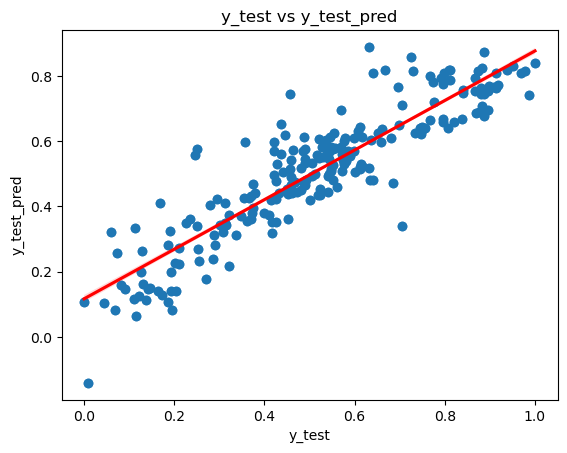

In [68]:
# Visualising the y_test (actual data) and y_test_pred (predicted data)

plt.figure()
sns.regplot(x=y_test,y=y_test_pred, ci=52, fit_reg=True, line_kws={"color": "red"})
plt.scatter(y_test,y_test_pred)
plt.title("y_test vs y_test_pred", fontsize=12)              
plt.xlabel("y_test", fontsize=10)                       
plt.ylabel("y_test_pred", fontsize=10)                       
plt.show()

y_test and y_test_predict values have shown a strong visual appearance. So, Our prediction is evaluated as healthy fit.

In [69]:
round(lm.params,4)

const                      0.1938
yr                         0.2330
holiday                   -0.1011
temp                       0.4712
spring                    -0.1107
winter                     0.0558
July                      -0.0688
Sep                        0.0658
Light Snow + Light Rain   -0.3002
Mist + Cloudy             -0.0796
dtype: float64


#### So, Equation for the best fitted line is : 
   
#### cnt = 0.1938 + (0.2330 * yr) - (0.1011 * holiday) + (0.4712 * temp) - (0.1107 * spring) + (0.0558 * winter) - (0.0688 * July) + (0.0658 * Sep) - (0.3002 * (Light Snow+Light Rain)) - (0.0796 * (Mist+Cloudy))
   
   
   
   


- Coefficient of "Year", "Temperature", "Winter", and "September" are positive.
- Coefficient of "Holiday", "Spring", "July", "Light Snow or Light Rain", and "Mist Cloudy" are Negative.
- Constant is 0.1938. That means if all selected independent variables are kept as 0, the demand will be 0.1938. 

## Summary and Business Recommendations

- Most important and significant feature is “Temperature”, with a coefficient of 0.4712, that means every change in temperature of 1 degree, demand increases of 47%. So, Company should focus on temperature first.


- "Year" with a psotitive coefficient value of 0.2330. Based on the historic data, the company is expected to see a good annual growth over last year at around 23%. This helps company’s revenue and cost projections over a period of time.


- Every "Winter" season demand is expected to increase by a factor of 0.0558, which shows more number of peoples are willing to take Bikes as per the good weather condition. Also "September" (transition from summer to winter) month shows a positive impact on Bike rentals.


- People don't like to travel on Bikes during rainy seasons and hot weather conditions as our coefficients of the month of "July" (which is a summer month), "Light Snow+Light Rain" and "Mist+Cloudy" tells the negative impact. "Spring" shows a negative coefficient to demonstrate demand decreases as hot day comes. 


- And finally, without a single variable considered, the bike sharing company is getting positive business growth of 19%, which is our "Constant" value.